<a href="https://colab.research.google.com/github/sandrarairan/PaliGemma-2-Mix/blob/main/PaliGemma_2_mix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cargar librerias

In [ ]:
#!pip install -q -U accelerate bitsandbytes git+https://github.com/huggingface/transformers.git gradio

In [ ]:
!pip install -q -U accelerate bitsandbytes transformers=='4.41.2' gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00


In [1]:
!pip install gradio -U bitsandbytes -U transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5

### HuggingFace Login

In [2]:
from huggingface_hub import notebook_login

notebook_login()

## Cargando modelo

In [2]:
from transformers import AutoTokenizer, PaliGemmaForConditionalGeneration, PaliGemmaProcessor
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "google/paligemma2-3b-mix-224"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16)
processor = PaliGemmaProcessor.from_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.07G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [3]:
import torch
import numpy as np
from PIL import Image
import requests

input_image = Image.open('/content/srycereza.jpg')

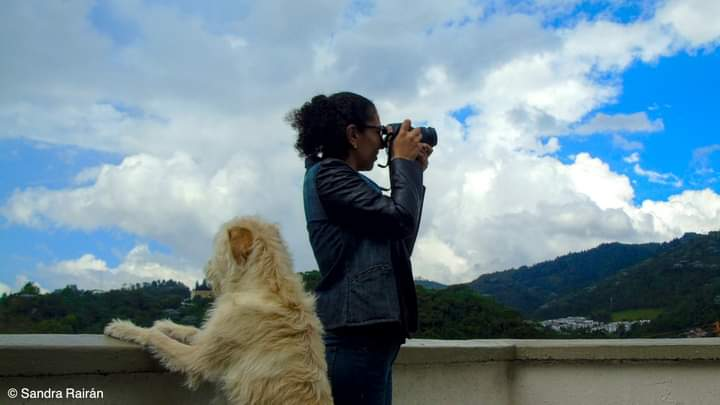

In [4]:
input_image

## Describir imagenes

In [5]:
input_text = "caption"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


caption
In this image we can see a woman holding a camera in her hands and standing. We can also see a dog, a wall, some trees, the hills and the sky which looks cloudy.


In [6]:
input_text = "caption es"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


caption es
In this image we can see a woman holding a camera in her hands and standing. We can also see a dog, a wall, some trees, some buildings, some grass on the ground and the sky which looks cloudy.


## Q&A en imagenes


In [8]:
input_text = "cuantas camaras hay?"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


cuantas camaras hay?
1


In [ ]:
#what kind of bird is it?
#what type of bird is it?
#What scientific name does that bird have?

In [9]:
input_text = "qcuantos perros hay?"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


qcuantos perros hay?
1


## Deteccion de objetos

In [10]:
input_text = "detect camara"
#input_text = "detect hard hat; helmet"

inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


detect camara
<loc0310><loc0542><loc0411><loc0614> camara


### Limpiando las coordenadas

In [11]:
output = result[len(input_text):].lstrip("\n")
output_list = output.split(';')

In [12]:
output_list

['<loc0310><loc0542><loc0411><loc0614> camara']

### Generar coordenadas

In [13]:
import re

image_width, image_height = input_image.size

_SEGMENT_DETECT_RE = re.compile(
    r'(.*?)' +
    r'<loc(\d{4})>' * 4 + r'\s*' +
    '(?:%s)?' % (r'<seg(\d{3})>' * 16) +
    r'\s*([^;<>]+)? ?(?:; )?',
)

labels, boxes = [], []

for _ in output_list:
    m = _SEGMENT_DETECT_RE.match(_)
    gs = list(m.groups())
    before = gs.pop(0)
    name = gs.pop()
    y1, x1, y2, x2 = [int(x) / 1024 for x in gs[:4]]
    y1 = y1  * image_height
    x1 = x1  * image_width
    y2 = y2  * image_height
    x2 = x2  * image_width
    boxes.append((x1, y1, x2, y2))
    labels.append(name)


In [14]:
boxes

[(381.09375, 122.607421875, 431.71875, 162.5537109375)]

In [15]:
labels

['camara']

### Generando imagen

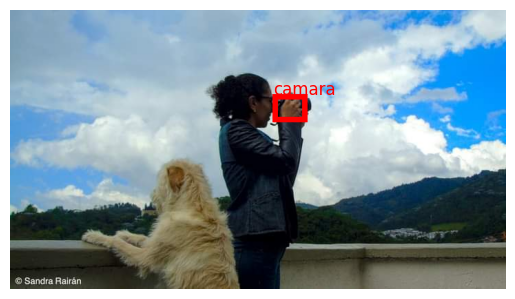

In [16]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
image_copy = input_image.copy()

draw = ImageDraw.Draw(image_copy)
for i in range(len(boxes)):
  draw.rectangle(boxes[i], outline="red", width=8)
  plt.text(boxes[i][0], boxes[i][1], labels[i], color='red', fontsize=12)
# Mostrar la imagen con el rectángulo
plt.imshow(image_copy)
plt.axis('off')
plt.show()

### Un ejemplo mas

In [17]:
input_image = Image.open('/content/FB_IMG_1706110550904.jpg')

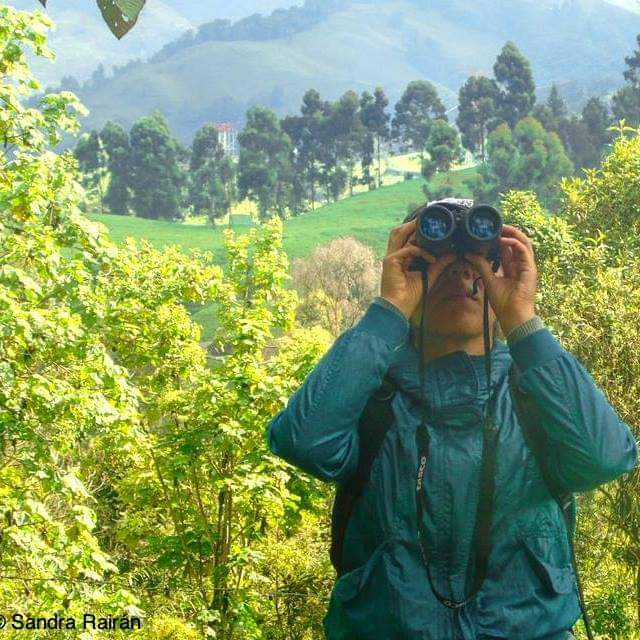

In [18]:
input_image

In [19]:
input_text = "detect binoculares"

inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


detect binoculares
<loc0320><loc0652><loc0416><loc0797> binoculares


In [20]:
output = result[len(input_text):].lstrip("\n")
output_list = output.split(';')
output_list

['<loc0320><loc0652><loc0416><loc0797> binoculares']

In [21]:
def get_coordinates(output_list, image_height,image_width ):
  labels, boxes = [], []

  for _ in output_list:
      m = _SEGMENT_DETECT_RE.match(_)
      gs = list(m.groups())
      before = gs.pop(0)
      name = gs.pop()
      y1, x1, y2, x2 = [int(x) / 1024 for x in gs[:4]]
      y1 = y1  * image_height
      x1 = x1  * image_width
      y2 = y2  * image_height
      x2 = x2  * image_width
      boxes.append((x1, y1, x2, y2))
      labels.append(name)
  return boxes, labels

In [22]:
image_width, image_height = input_image.size
boxes, labels = get_coordinates(output_list, image_height,image_width)

In [23]:
def draw_detection(image, boxes, labels):
  draw = ImageDraw.Draw(image_copy)
  for i in range(len(boxes)):
    draw.rectangle(boxes[i], outline="red", width=8)
    plt.text(boxes[i][0], boxes[i][1], labels[i], color='red', fontsize=10)
  # Mostrar la imagen con el rectángulo
  plt.imshow(image_copy)
  plt.axis('off')
  plt.show

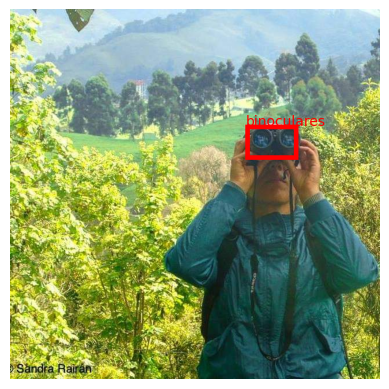

In [24]:
image_copy = input_image.copy()
draw_detection(image_copy,boxes,labels)

## Segmentacion de objetos

In [25]:
input_text = "segment binoculares"
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
model.to(device)
inputs = inputs.to(dtype=model.dtype)

with torch.no_grad():
  output = model.generate(**inputs, max_length=496)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


segment binoculares
<loc0317><loc0403><loc1009><loc1020><seg091><seg078><seg078><seg069><seg048><seg017><seg043><seg048><seg025><seg109><seg099><seg094><seg117><seg004><seg045><seg029>


In [26]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="google/paligemma-hf", filename="vae-oid.npz",
                repo_type="space", local_dir="./")

vae-oid.npz:   0%|          | 0.00/8.48M [00:00<?, ?B/s]

'vae-oid.npz'

In [27]:
import re
import flax.linen as nn
import jax
import jax.numpy as jnp
import numpy as np
import functools
import PIL

_MODEL_PATH = 'vae-oid.npz'

_SEGMENT_DETECT_RE = re.compile(
    r'(.*?)' +
    r'<loc(\d{4})>' * 4 + r'\s*' +
    '(?:%s)?' % (r'<seg(\d{3})>' * 16) +
    r'\s*([^;<>]+)? ?(?:; )?',
)


def _get_params(checkpoint):

  def transp(kernel):
    return np.transpose(kernel, (2, 3, 1, 0))

  def conv(name):
    return {
        'bias': checkpoint[name + '.bias'],
        'kernel': transp(checkpoint[name + '.weight']),
    }

  def resblock(name):
    return {
        'Conv_0': conv(name + '.0'),
        'Conv_1': conv(name + '.2'),
        'Conv_2': conv(name + '.4'),
    }

  return {
      '_embeddings': checkpoint['_vq_vae._embedding'],
      'Conv_0': conv('decoder.0'),
      'ResBlock_0': resblock('decoder.2.net'),
      'ResBlock_1': resblock('decoder.3.net'),
      'ConvTranspose_0': conv('decoder.4'),
      'ConvTranspose_1': conv('decoder.6'),
      'ConvTranspose_2': conv('decoder.8'),
      'ConvTranspose_3': conv('decoder.10'),
      'Conv_1': conv('decoder.12'),
  }


def _quantized_values_from_codebook_indices(codebook_indices, embeddings):
  batch_size, num_tokens = codebook_indices.shape
  assert num_tokens == 16, codebook_indices.shape
  unused_num_embeddings, embedding_dim = embeddings.shape

  encodings = jnp.take(embeddings, codebook_indices.reshape((-1)), axis=0)
  encodings = encodings.reshape((batch_size, 4, 4, embedding_dim))
  return encodings


@functools.cache
def _get_reconstruct_masks():
  """Reconstructs masks from codebook indices.
  Returns:
    A function that expects indices shaped `[B, 16]` of dtype int32, each
    ranging from 0 to 127 (inclusive), and that returns a decoded masks sized
    `[B, 64, 64, 1]`, of dtype float32, in range [-1, 1].
  """

  class ResBlock(nn.Module):
    features: int

    @nn.compact
    def __call__(self, x):
      original_x = x
      x = nn.Conv(features=self.features, kernel_size=(3, 3), padding=1)(x)
      x = nn.relu(x)
      x = nn.Conv(features=self.features, kernel_size=(3, 3), padding=1)(x)
      x = nn.relu(x)
      x = nn.Conv(features=self.features, kernel_size=(1, 1), padding=0)(x)
      return x + original_x

  class Decoder(nn.Module):
    """Upscales quantized vectors to mask."""

    @nn.compact
    def __call__(self, x):
      num_res_blocks = 2
      dim = 128
      num_upsample_layers = 4

      x = nn.Conv(features=dim, kernel_size=(1, 1), padding=0)(x)
      x = nn.relu(x)

      for _ in range(num_res_blocks):
        x = ResBlock(features=dim)(x)

      for _ in range(num_upsample_layers):
        x = nn.ConvTranspose(
            features=dim,
            kernel_size=(4, 4),
            strides=(2, 2),
            padding=2,
            transpose_kernel=True,
        )(x)
        x = nn.relu(x)
        dim //= 2

      x = nn.Conv(features=1, kernel_size=(1, 1), padding=0)(x)

      return x

  def reconstruct_masks(codebook_indices):
    quantized = _quantized_values_from_codebook_indices(
        codebook_indices, params['_embeddings']
    )
    return Decoder().apply({'params': params}, quantized)

  with open(_MODEL_PATH, 'rb') as f:
    params = _get_params(dict(np.load(f)))

  return jax.jit(reconstruct_masks, backend='cpu')

def extract_objs(text, width, height, unique_labels=False):
  """Returns objs for a string with "<loc>" and "<seg>" tokens."""
  objs = []
  seen = set()
  while text:
    m = _SEGMENT_DETECT_RE.match(text)
    if not m:
      break
    gs = list(m.groups())
    before = gs.pop(0)
    name = gs.pop()
    y1, x1, y2, x2 = [int(x) / 1024 for x in gs[:4]]

    y1, x1, y2, x2 = map(round, (y1*height, x1*width, y2*height, x2*width))
    seg_indices = gs[4:20]
    if seg_indices[0] is None:
      mask = None
    else:
      seg_indices = np.array([int(x) for x in seg_indices], dtype=np.int32)
      m64, = _get_reconstruct_masks()(seg_indices[None])[..., 0]
      m64 = np.clip(np.array(m64) * 0.5 + 0.5, 0, 1)
      m64 = PIL.Image.fromarray((m64 * 255).astype('uint8'))
      mask = np.zeros([height, width])
      if y2 > y1 and x2 > x1:
        mask[y1:y2, x1:x2] = np.array(m64.resize([x2 - x1, y2 - y1])) / 255.0

    content = m.group()
    if before:
      objs.append(dict(content=before))
      content = content[len(before):]
    while unique_labels and name in seen:
      name = (name or '') + "'"
    seen.add(name)
    objs.append(dict(
        content=content, xyxy=(x1, y1, x2, y2), mask=mask, name=name))
    text = text[len(before) + len(content):]

  if text:
    objs.append(dict(content=text))

  return objs

In [28]:
result = result[len(input_text):].lstrip("\n")

In [29]:
width = input_image.size[0]
height = input_image.size[1]
masks = extract_objs(result, width, height)

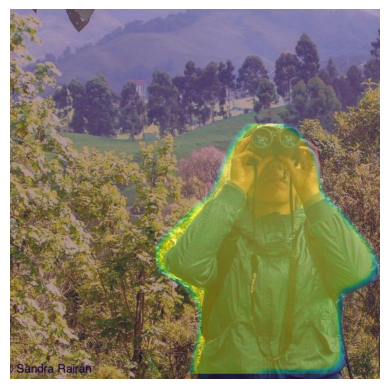

In [30]:
import matplotlib.pyplot as plt

plt.imshow(input_image, cmap='gray')

for _ in masks:
  if 'mask' in _:
    plt.imshow(_['mask'], cmap='viridis', alpha=0.4, vmin=0, vmax=1)

plt.axis('off')
plt.show()